In [ ]:
%matplotlib widget
import numpy as np
import json, os, glob
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

# Plot data 
### [Average scans](#averaged_XAS)
### [Overlay scans](#over_XAS)

<a id='averaged_XAS'></a>
## Plot averaged data

[31, 32]
2 scan(s), 108318 total on/off shots


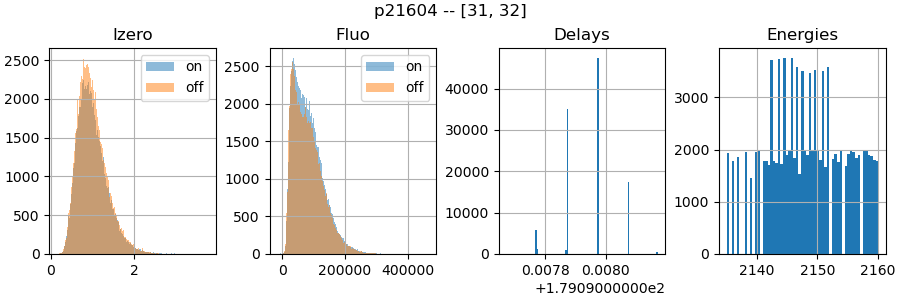

Time delay axis rebinned with delay stage data


In [2]:
pgroup = 'p21604'
Loaddir_name = 'All_shots_test'

twodiodes = True
withTT    = False

runlist = np.arange(63, 73)
#runlist = np.arange(45, 48)
runlist = [31, 32]

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, Loaddir_name)
#Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}'.format(Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
from sfdata import SFScanInfo
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist, twodiodes)

globals().update(data)
print (runlist)
print ('{} scan(s), {} total on/off shots'.format(len(runlist), len(pump_1)))

Plot_data(pgroup, runlist, data, withTT)

pump_1       = np.asarray(pump_1)
unpump_1     = np.asarray(unpump_1)
Izero_pump   = np.asarray(Izero_pump)
Izero_unpump = np.asarray(Izero_unpump)
Delays_stage = np.asarray(Delays_stage)
arrTimes     = np.asarray(arrTimes)
energy       = np.asarray(energy)
Delays_corr  = np.asarray(Delays_corr)
readbacks    = np.asarray(readbacks)

# 1D (energy) scan at fix delay

In [24]:
quantile = 0.8

##############################################

rbk = readbacks[0]

pp, GS, ES, err_pp, err_GS, err_ES, err_pp2, err_GS2, err_ES2, howmany = rebin_and_filter_XAS(data, quantile, rbk)

117 59 118
69185 shots out of 108318 survived


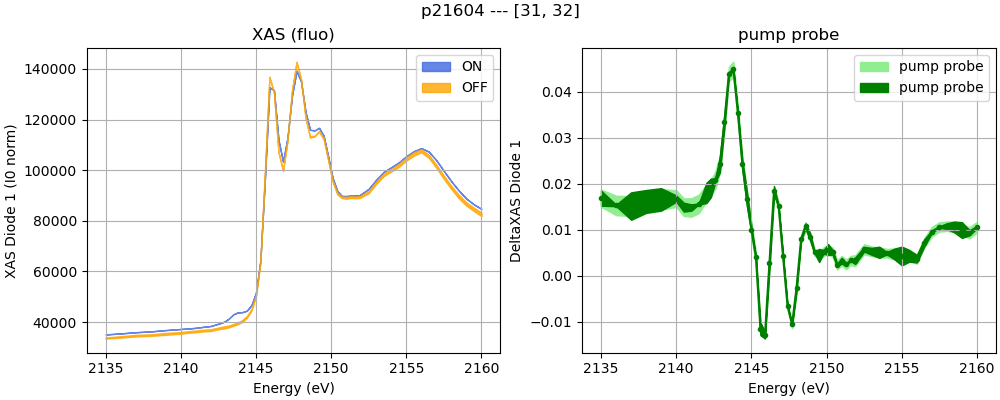

In [26]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.suptitle(titlestring_stack)

ax1.fill_between(rbk, ES-err_ES, ES+err_ES, label='ON', color='royalblue', alpha = 0.8)
ax1.fill_between(rbk, GS-err_GS, GS+err_GS, label='OFF',color='orange', alpha = 0.8)
ax3.fill_between(rbk, pp-err_pp, pp+err_pp, label='pump probe',color='lightgreen')
ax3.fill_between(rbk, pp-err_pp2, pp+err_pp2, label='pump probe',color='green')
ax3.plot(rbk, pp, color='green', marker='.')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax3.set_xlabel("Energy (eV)")
ax3.set_ylabel ("DeltaXAS Diode 1")
ax3.set_title('pump probe')
ax3.legend(loc="best")
ax3.grid()

plt.show()

# 2D (energy vs delay) scan

In [3]:
quantile = 0.8

withTT = True

binsize = 10
min_delay = -500
max_delay = 1000

variable_bins_delay = False
numbins=100

##############################################
rbk = readbacks[0]

pp_TT, err_pp, Delay_fs_TT, howmany = \
rebin_and_filter_XAS_2D(data, binsize, min_delay, max_delay, quantile, rbk, withTT, varbin_t=variable_bins_delay, numbins=numbins)

369 37 149
Time delay axis rebinned with TT data
939842 shots out of 1784854 survived (52.66%)


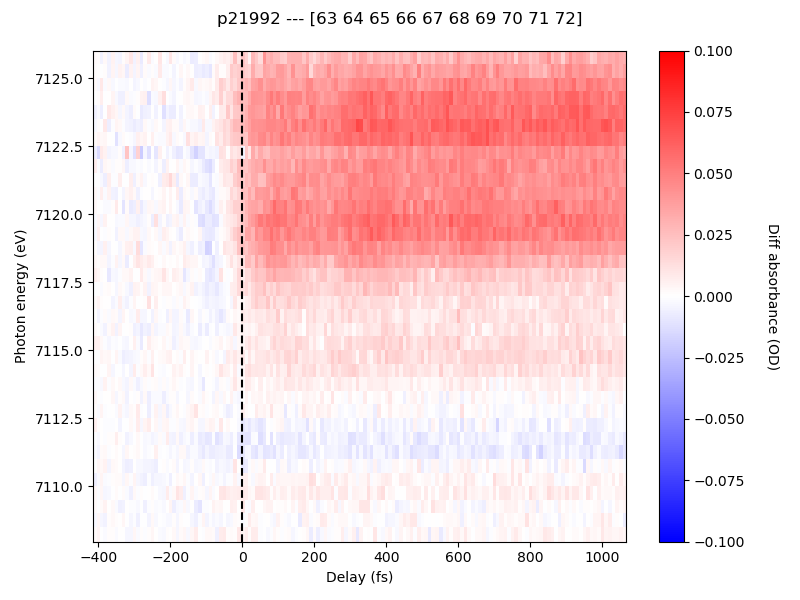

In [4]:
baseline = np.average(pp_TT[:,0:10], axis=1)
baseline = baseline[:, np.newaxis]

# Delay_fs_TT_2 = Delay_fs_TT[~np.isnan(Delay_fs_TT)]
# pp_TT = pp_TT[:,~np.isnan(Delay_fs_TT)]

plt.figure(figsize=(8, 6))
#plt.rcParams.update({'font.size': 15})
plt.suptitle(titlestring_stack)
#plt.title(runlist)
plt.pcolormesh(Delay_fs_TT+80, rbk, pp_TT-baseline, cmap='bwr', vmin=-0.1, vmax = 0.1)
#plt.pcolormesh(pp_TT-baseline, cmap='bwr', vmin=-0.1, vmax = 0.1)
#plt.ylabel('{} ({})'.format(scan.parameters['name'][0],scan.parameters['units'][0]))
plt.ylabel('Photon energy (eV)')

cbar = plt.colorbar(fraction=0.15)
cbar.set_label('Diff absorbance (OD)', rotation=270, labelpad=25)

#plt.colorbar()
plt.xlabel('Delay (fs)')
plt.axvline(x = 0, color = 'k', linestyle = '--')
#plt.grid()
plt.tight_layout()
plt.show()

<a id='over_XAS'></a>
## Plot overlaied data

In [27]:
pgroup = 'p21604'

runlist = np.arange(45, 48)
runlist = [31, 32]

Loaddir_folder = 'All_shots_test'

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_folder)

titlestring_stack = pgroup + ' --- ' +str(runlist)
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))
check = []
for run in runlist:
    try:
        check.append(glob.glob(Loaddir + '/*{:04d}*/*run_array*'.format(run))[0])
    except:
        print("Some runs are missing")
check

Will load 2 runs: [31, 32] from /sf/alvra/data/p21604/work/Reduced_data/All_shots_test/


['/sf/alvra/data/p21604/work/Reduced_data/All_shots_test/run0031-Cu_XANES_100ps_varsteps_10uJ/run_array.npy',
 '/sf/alvra/data/p21604/work/Reduced_data/All_shots_test/run0032-CuXP_XANES_100ps_varsteps_10uJ/run_array.npy']

58 59 59
26493 shots out of 54108 survived
58 59 59
26423 shots out of 54210 survived


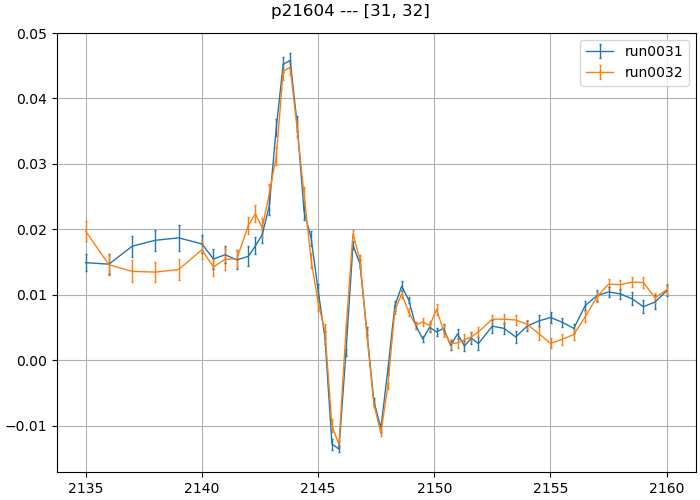

In [30]:
quantile = 0.7
twodiodes = True

####################################################

fig, (ax1) = plt.subplots(1, figsize=(7, 5), constrained_layout=True)
plt.suptitle(titlestring_stack)

lab = ['DMM','N2Q','N4PY']

for index, run in enumerate(runlist):
    runname = 'run{:04d}'.format(run)
    data = {}
    data, _ = load_reduced_data(pgroup, Loaddir, [run], twodiodes)
    globals().update(data)
    #runname = np.asarray(data['name'])[0]
    rbk = np.asarray(data['readbacks'])[0]

    pp_rebin, GS, ES, err_pp, err_GS, err_ES, _, _, _, _ = \
    rebin_and_filter_XAS(data, quantile, rbk)

    ax1.errorbar(rbk, pp_rebin, err_pp, lw=1,markersize=0,capsize=1,capthick=1,
                   elinewidth=1,label=runname)#+' '+str(lab[index]))
    
ax1.legend()
ax1.grid()


# OLD

In [49]:
pgroup = 'p21992'
Loaddir_name = 'XANES'

#runlist = np.arange(22, 23)
#runlist = [140, 146, 141, 147, 145]
runlist = [84, 90, 93, 97, 105, 116, 118, 124, 126, 132, 134, 140, 142]

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist)

globals().update(data)
print (runlist)
print ('{} scan(s), {} steps each'.format(len(runlist), int(len(DataDiode1_pump)/len(runlist))))

[84, 90, 93, 97, 105, 116, 118, 124, 126, 132, 134, 140, 142]
13 scan(s), 16 steps each


In [14]:
pgroup = 'p21992'
Loaddir_name = 'XANES'

#runlist = np.arange(22, 23)
#runlist = [140, 146, 141, 147, 145]
runlist = [93]

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}'.format(pgroup, Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist)

globals().update(data)
print (runlist)
print (len(pump_1))
print ('{} scan(s), {} steps each'.format(len(runlist), int(len(pump_1)/len(runlist))))

[93]
6324
1 scan(s), 6324 steps each


# ONE diode: 
* [Plot averaged curves](#Ave_data)
* [Overlay different scans](#Overlay)

# TWO diodes:
* [Plot averaged curves](#Ave_data_2)
* [Overlay different scans](#Overlay2)
* [Average the 2 diodes](#average_2diodes)

<a id='Ave_data'></a>
## Average scans 1 diode

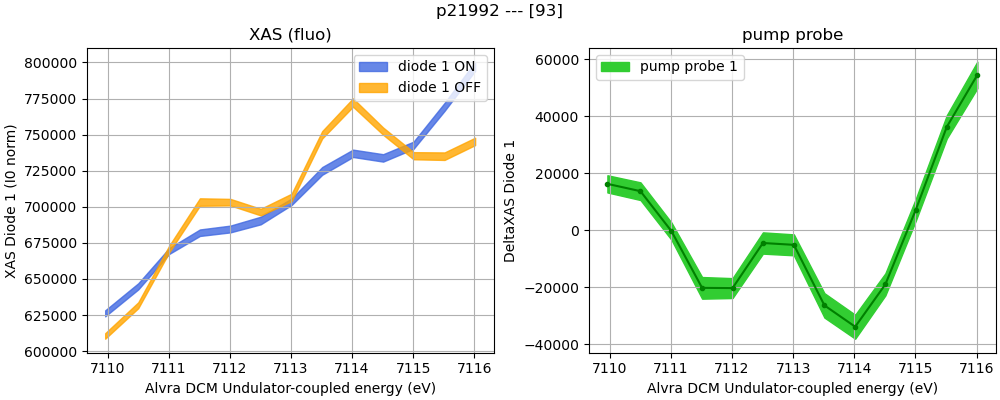

In [15]:
Energy_eV, DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, goodshots1 = \
Plot_AveScans_1diode(titlestring_stack, scan, data, len(runlist), timescan=False)

## save the averaged spectra to load them overlaid

In [368]:
run_name = glob.glob(Loaddir + '/*{:04d}*'.format(runlist[0]))[0].split('/')[-1]
reducedir ='/das/work/p20/p20572/Camila/Reduced_XANES/Averaged/'
os.makedirs(reducedir+run_name, exist_ok=True)

def average_array(array, axis):
    return np.mean(array, axis=axis)
save_reduced_data_1diode(reducedir, run_name, scan, 
                         average_array(DataDiode1_pump, 0), 
                         average_array(DataDiode1_unpump, 0), 
                         average_array(Pump_probe_Diode1, 0), 
                         average_array(goodshots1, 0),
                         average_array(correlation1, 0))
print (reducedir+run_name)

/das/work/p20/p20572/Camila/Reduced_XANES/Averaged/run0136-Fe3_CytC_XAS_5000fs_1.1uJ


In [249]:
np.shape(Pump_probe_Diode1)
pp_100ns = np.average(Pump_probe_Diode1, axis=0)

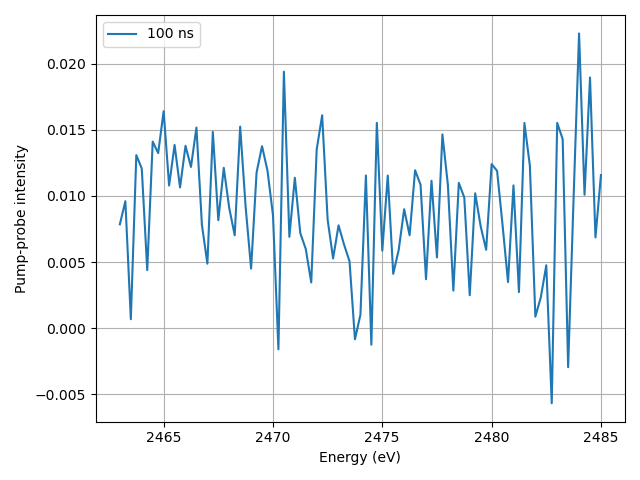

In [250]:
fig, ax = plt.subplots()

# ax.plot(Energy_eV, pp_250fs[:,0], label='250 fs')
# ax.plot(Energy_eV, pp_3ps[:,0], label='3 ps')
# ax.plot(Energy_eV, pp_25ps[:,0], label='25 ps')
ax.plot(Energy_eV, pp_100ns[:,0], label='100 ns')

# ax.fill_between(Energy_eV, pp_250fs[:,1], pp_250fs[:,2], color='b', alpha=0.3)
# ax.fill_between(Energy_eV, pp_3ps[:,1], pp_3ps[:,2], color='orange', alpha=0.3)
# ax.fill_between(Energy_eV, pp_25ps[:,1], pp_25ps[:,2], color='g', alpha=0.3)
# ax.fill_between(Energy_eV, pp_100ns[:,1], pp_100ns[:,2], color='r', alpha=0.3)

ax.set_title('')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Pump-probe intensity')

ax.grid()
ax.legend()
plt.tight_layout()
plt.show()

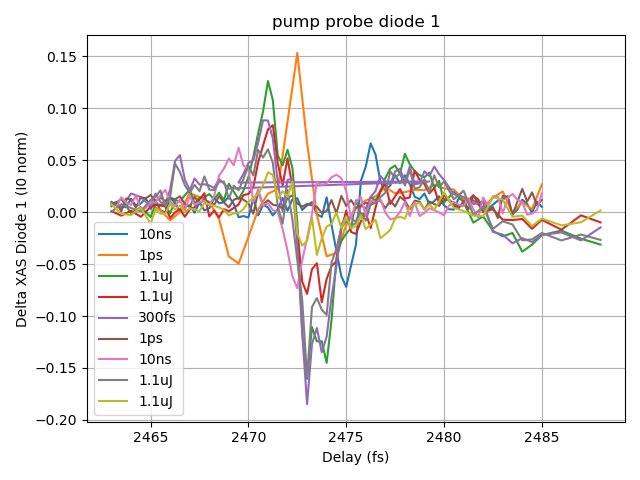

In [169]:
fig, ax1 = plt.subplots(1)

paths = glob.glob(reducedir+'*/run_array.npy')
run_arrays = [np.load(path, allow_pickle=True).item() for path in paths]

for run_array in run_arrays:
    
    for key in run_array.keys():
        delay = run_array[key]['name'].split('_')[-1]
        runnumber = run_array[key]["name"].split('-')[0]
        if 'averaged' in Loaddir:
            runnumber = run_array[key]["name"].split('-')[0] + '_avg'
        Energy_eV = run_array[key]["readbacks"]
        XAS1_pump_probe = run_array[key]["Pump_probe_Diode1"]
        D1p = run_array[key]["DataDiode1_pump"]
        D1u = run_array[key]["DataDiode1_unpump"]
        gs1 = run_array[key]["goodshots1"]
        
        err1_low_pump    = (D1p[:,0]-D1p[:,1])/np.sqrt(gs1)
        err1_high_pump   = (D1p[:,2]-D1p[:,0])/np.sqrt(gs1)
        err1_low_unpump  = (D1u[:,0]-D1u[:,1])/np.sqrt(gs1)
        err1_high_unpump = (D1u[:,2]-D1u[:,0])/np.sqrt(gs1)
        
        err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
        err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)
        
        #ax1.plot(Energy_eV, D1p[:,0], label=runnumber)
        #ax1.plot(Energy_eV, XAS2_pump_probe[:,0], label=lab[index]+'_'+runnumber)
        # ax3 = plt.twinx(ax1)
        # ax3.plot(Energy_eV, XAS1_pump_probe[:,0], label=runnumber)
        
        ax1.plot(Energy_eV, XAS1_pump_probe[:,0], label=delay)
        
        
ax1.set_xlabel("Delay (fs)")
ax1.set_ylabel ("Delta XAS Diode 1 (I0 norm)")
ax1.legend()
ax1.grid()

ax1.set_title('pump probe diode 1')

plt.tight_layout()
plt.show()

<a id='Overlay'></a>
## Overlay different scans 1 diode

In [7]:
pgroup = 'p21992'
#runlist = np.arange(10, 12, 1)
runlist = [169, 178]
#runlist = [124, 126, 132, 134, 140, 142]

Loaddir_folder = 'XANES'

##############################################
Loaddir = '/sf/alvra/data/{}/work/Reduced_data/{}/'.format(pgroup, Loaddir_folder)
titlestring_stack = pgroup + ' --- ' +str(runlist)
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))
check = []
for run in runlist:
    try:
        check.append(glob.glob(Loaddir + '/*{:04d}*/*run_array*'.format(run))[0])
    except:
        print("Some runs are missing")
check

Will load 2 runs: [169, 178] from /sf/alvra/data/p21992/work/Reduced_data/XANES/


['/sf/alvra/data/p21992/work/Reduced_data/XANES/run0169-MbCO_30um_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0178-MbCO_30um_XANES_500fs/run_array.npy']

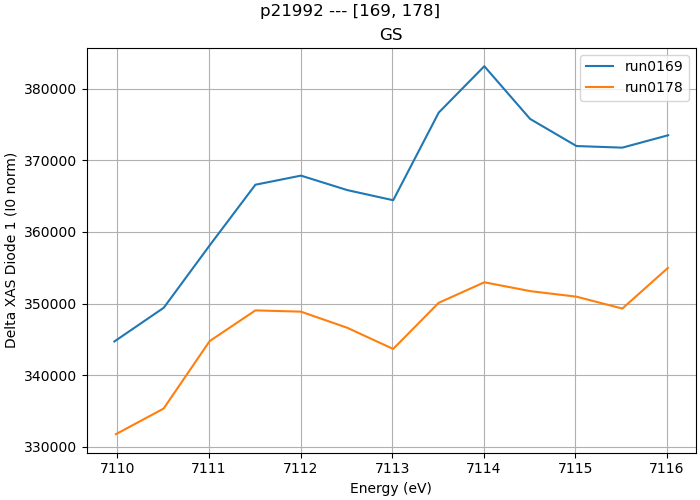

In [9]:
fig, (ax1) = plt.subplots(1, figsize=(7, 5), constrained_layout=True)
plt.suptitle(titlestring_stack)
if 'averaged' in Loaddir:
    plt.suptitle(titlestring_stack + ' averaged')

keys = []
#lab = ['50ps','1ps','200fs']
spec = {}
for index, run in enumerate(runlist):
    path = glob.glob(Loaddir + '/*{:04d}*/'.format(run))
    run_array = np.load(path[0]+'run_array.npy', allow_pickle=True).item()
    for key in run_array.keys():
        runnumber = run_array[key]["name"].split('-')[0]
        
        if 'averaged' in Loaddir:
            runnumber = run_array[key]["name"].split('-')[0] + '_avg'
        #Energy_eV = run_array[key]["Energy_eV"]
        Energy_eV = run_array[key]["readbacks"]
        XAS1_pump_probe = run_array[key]["Pump_probe_Diode1"]
        D1p = run_array[key]["DataDiode1_pump"]
        D1u = run_array[key]["DataDiode1_unpump"]
        gs1 = run_array[key]["goodshots1"]
        
        err1_low_pump    = (D1p[:,0]-D1p[:,1])/np.sqrt(gs1)
        err1_high_pump   = (D1p[:,2]-D1p[:,0])/np.sqrt(gs1)
        err1_low_unpump  = (D1u[:,0]-D1u[:,1])/np.sqrt(gs1)
        err1_high_unpump = (D1u[:,2]-D1u[:,0])/np.sqrt(gs1)
        
        err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
        err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)
        
        # ax1.plot(Energy_eV, (D1u[:,0]-np.mean(D1u[:5,0]))/np.max(D1u[:,0]-np.mean(D1u[:5,0])), label=runnumber)
        #spec[runnumber] = (D1u[:,0]-np.mean(D1u[:15,0]))/np.max(D1u[:,0]-np.mean(D1u[:15,0]))
        # chosen_point = 7113
        # index_point = np.int(np.argwhere(Energy_eV > chosen_point)[0])
        spec[runnumber] = (D1u[:,0])#- D1u[0,0])
        #spec[runnumber] = (XAS1_pump_probe[:,0]-np.mean(XAS1_pump_probe[:5,0]))/np.max(XAS1_pump_probe[:,0]-np.mean(XAS1_pump_probe[:5,0]))
        ax1.plot(Energy_eV, spec[runnumber], label=runnumber) #plot ground state
        #ax1.plot(Energy_eV, XAS1_pump_probe[:,0], label=runnumber) #plot pump probe
        #ax1.plot(Energy_eV, D1u[:,0], label=runnumber) #plot ground state
        #ax1.axes.errorbar(Energy_eV, D1u[:,0], err1_low_unpump, err1_high_unpump, label=runnumber) #plot laser off

        # ax1.axes.errorbar(Energy_eV, XAS1_pump_probe[:,0], (err1_low_pump_probe, err1_high_pump_probe), label=runnumber)
        #ax2 = plt.twinx(ax1)
        #ax2.plot(Energy_eV, D1p[:,0], label=runnumber)
        
        
# ax1.plot(Energy_eV, spec['run0041']-spec['run0071'])       
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("Delta XAS Diode 1 (I0 norm)")
#ax1.set_ylim(0, 0.2e6)
#ax1.set_xlim(7110, 7120)
ax1.legend()
ax1.grid()

#ax1.vlines(x=[2466.35,2466.75, 2469.55, 2472], ymin=-0.3, ymax=0.3, colors='black', ls='--', lw=1)

ax1.set_title('GS')
plt.show()

<a id='Ave_data_2'></a>
## Average scans 2 diodes

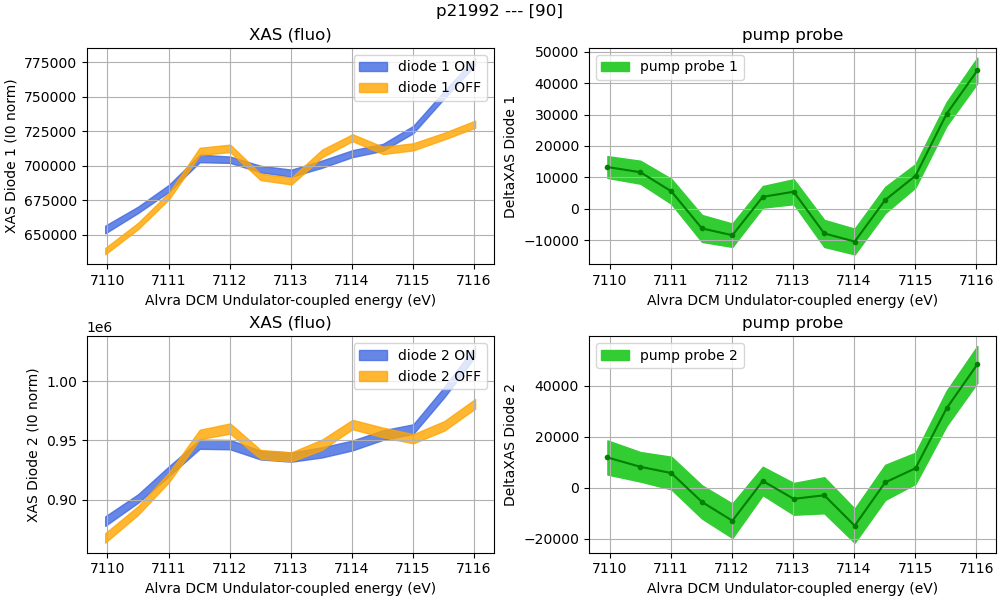

In [20]:
Energy_eV, DataDiode1_pump, DataDiode2_pump, DataDiode1_unpump, DataDiode2_unpump, Pump_probe_Diode1, Pump_probe_Diode2, goodshots1, goodshots2 = \
Plot_AveScans_2diodes(titlestring_stack, scan, data, len(runlist), timescan=False)

## save the averaged spectra to load them overlaid

In [83]:
run_name = glob.glob(Loaddir + '/*{:04d}*'.format(runlist[0]))[0].split('/')[-1]
reducedir ='../Claudio/Reduced_XANES_test/averaged/'
os.makedirs(reducedir+run_name, exist_ok=True)

def average_array(array, axis):
    return np.mean(array, axis=axis)
save_reduced_data_2diodes(reducedir, run_name, scan, 
                          average_array(DataDiode1_pump, 0), 
                          average_array(DataDiode1_unpump, 0), 
                          average_array(Pump_probe_Diode1, 0), 
                          average_array(goodshots1, 0), 
                          average_array(correlation1, 0),
                          average_array(DataDiode2_pump, 0), 
                          average_array(DataDiode2_unpump, 0), 
                          average_array(Pump_probe_Diode2, 0), 
                          average_array(goodshots2, 0),
                          average_array(correlation2, 0))
print (reducedir+run_name)

NameError: name 'DataDiode2_pump' is not defined

<a id='Overlay2'></a>
## Overlay different scans 2 diodes

In [107]:
pgroup = 'p21992'
#runlist = np.arange(10, 12, 1)

runlist = [90, 93, 97, 103, 105, 118]

Loaddir_folder = 'Reduced_data/XANES'

##############################################
Loaddir = '/sf/alvra/data/{}/work/{}/'.format(pgroup, Loaddir_folder)
titlestring_stack = pgroup + ' --- ' +str(runlist)
print ('Will load {} runs: {} from {}'.format(len(runlist), runlist, Loaddir))
check = []
for run in runlist:
    try:
        check.append(glob.glob(Loaddir + '/*{:04d}*/*run_array*'.format(run))[0])
    except:
        print("Some runs are missing")
check

Will load 6 runs: [90, 93, 97, 103, 105, 118] from /sf/alvra/data/p21992/work/Reduced_data/XANES/


['/sf/alvra/data/p21992/work/Reduced_data/XANES/run0090-MbCO_XANES_preedge_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0093-MbCO_XANES_preedge_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0097-MbCO_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0103-MbCO_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0105-MbCO_XANES_500fs/run_array.npy',
 '/sf/alvra/data/p21992/work/Reduced_data/XANES/run0118-MbCO_XANES_500fs/run_array.npy']

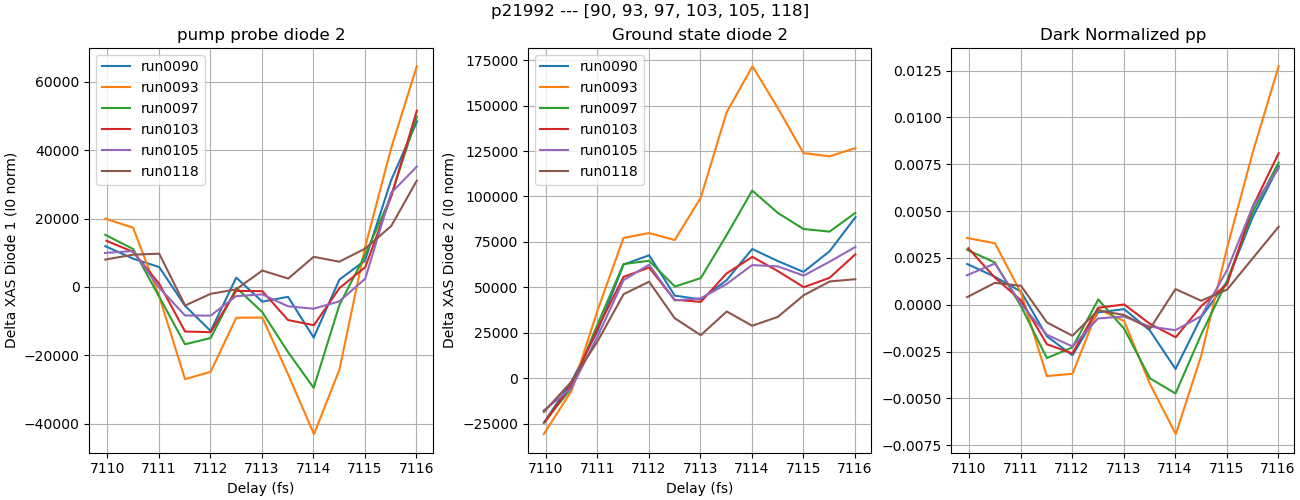

In [113]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(13, 5), constrained_layout=True)
plt.suptitle(titlestring_stack)
if 'averaged' in Loaddir:
    plt.suptitle(titlestring_stack + ' averaged')

keys = []
#lab = ['CuDD 200fs', '500 fs', '1ps', '10ps', '50ps', '100ps']
#lab = ['100 fs t0 adjust','200fs', '1 ps', '2 ps', '10 ps', '50ps', '100 ps']
for index, run in enumerate(runlist):
    path = glob.glob(Loaddir + '/*{:04d}*/'.format(run))
    run_array = np.load(path[0]+'run_array.npy', allow_pickle=True).item()
    for key in run_array.keys():
        runnumber = run_array[key]["name"].split('-')[0]
        if 'averaged' in Loaddir:
            runnumber = run_array[key]["name"].split('-')[0] + '_avg'
        Energy_eV = run_array[key]["readbacks"]
        XAS1_pump_probe = run_array[key]["Pump_probe_Diode1"]
        D1p = run_array[key]["DataDiode1_pump"]
        D1u = run_array[key]["DataDiode1_unpump"]
        gs1 = run_array[key]["goodshots1"]
        
        err1_low_pump    = (D1p[:,0]-D1p[:,1])/np.sqrt(gs1)
        err1_high_pump   = (D1p[:,2]-D1p[:,0])/np.sqrt(gs1)
        err1_low_unpump  = (D1u[:,0]-D1u[:,1])/np.sqrt(gs1)
        err1_high_unpump = (D1u[:,2]-D1u[:,0])/np.sqrt(gs1)
        
        err1_low_pump_probe   = np.sqrt(err1_low_pump**2  + err1_low_unpump**2)
        err1_high_pump_probe  = np.sqrt(err1_high_pump**2 + err1_high_unpump**2)
        
        #ax1.plot(Energy_eV, D1p[:,0], label=runnumber)
        #ax1.plot(Energy_eV, XAS2_pump_probe[:,0], label=lab[index]+'_'+runnumber)
        # ax3 = plt.twinx(ax1)
        # ax3.plot(Energy_eV, XAS1_pump_probe[:,0], label=runnumber)
        
        XAS2_pump_probe = run_array[key]["Pump_probe_Diode2"]
        D2p = run_array[key]["DataDiode2_pump"]
        D2u = run_array[key]["DataDiode2_unpump"]
        gs2 = run_array[key]["goodshots2"]

        err2_low_pump    = (D2p[:,0]-D2p[:,1])/np.sqrt(gs2)
        err2_high_pump   = (D2p[:,2]-D2p[:,0])/np.sqrt(gs2)
        err2_low_unpump  = (D2u[:,0]-D2u[:,1])/np.sqrt(gs2)
        err2_high_unpump = (D2u[:,2]-D2u[:,0])/np.sqrt(gs2)

        err2_low_pump_probe   = np.sqrt(err2_low_pump**2  + err2_low_unpump**2)
        err2_high_pump_probe  = np.sqrt(err2_high_pump**2 + err2_high_unpump**2)
        
        
        #ax2.plot(Energy_eV, XAS2_pump_probe[:,0], label=runnumber) 
        
        #dark normalized pp 
        D2uN= D2u[:,0]/np.trapz(D2u[:,0],Energy_eV)
        D2pN= D2p[:,0]/np.trapz(D2u[:,0],Energy_eV)
        pp = (D2pN-np.mean(D2pN[:5]))-(D2uN-np.mean(D2uN[:5]))
        
        ax1.plot(Energy_eV, XAS2_pump_probe[:,0], label=runnumber)
        
        ax2.plot(Energy_eV, D2u[:,0]-np.mean(D2u[0:3,0]), label=runnumber)
        #ax2.plot(Energy_eV, D2uN-np.mean(D2uN[0:5]), label=runnumber)
        ax3.plot(Energy_eV, pp, label=runnumber)

        
        
ax1.set_xlabel("Delay (fs)")
ax1.set_ylabel ("Delta XAS Diode 1 (I0 norm)")
ax1.legend()
ax1.grid()
ax2.set_xlabel("Delay (fs)")
ax2.set_ylabel ("Delta XAS Diode 2 (I0 norm)")
ax2.legend()
ax2.grid()

ax1.set_title('pump probe diode 2')
ax2.set_title('Ground state diode 2')
ax3.set_title('Dark Normalized pp')
ax3.grid()
plt.show()

<a id='average_2diodes'></a>
## Average the 2 diodes

In [23]:
Energy_eV, ave_pp1 = Plot_2diodes_Averaged_2figs(titlestring_stack, scan, data, nscans=2, timescan=False)
Energy_eV, ave_pp1 = Plot_2diodes_Averaged_1fig(titlestring_stack, scan, data, nscans=2, timescan=False)

ValueError: cannot reshape array of size 13 into shape (2,newaxis)

In [71]:
pgroup = 'p21604'
Loaddir_name = 'Reduced_XANES'

#runlist = np.arange(22, 23)
runlist = [185, 186]

##############################################
Loaddir = '/sf/alvra/data/{}/work/{}/'.format(pgroup, Loaddir_name)
firstrun = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runlist[0]))[0]
scan = SFScanInfo(firstrun)

data = {}
globals().update(data)

data, titlestring_stack = load_reduced_data(pgroup, Loaddir, runlist)

globals().update(data)
print (runlist)
print ('{} scan(s), {} steps each'.format(len(runlist), int(len(DataDiode1_pump)/len(runlist))))

[185, 186]
2 scan(s), 88 steps each


### convert npy to mat files

In [29]:
pgroup = 'p20572'
Loaddir_folder = 'Reduced_XANES/Averaged'

Loaddir = '/sf/alvra/data/{}/work/Camila/{}/'.format(pgroup, Loaddir_folder)
run_name = glob.glob(Loaddir + '/*{:04d}*'.format(runlist[0]))[0].split('/')[-1]

import scipy.io
f = glob.glob(Loaddir + '/{}/*.npy*'.format(run_name))[0]

#for file in f:
temp = np.load(f, allow_pickle=True)
mdic = {run_name.split('-')[0]: temp,}
fname = file.split('/')[-1].split('.')[0]
path = (Loaddir + '/Matlab/')
os.makedirs(path, exist_ok=True)
#print (path + '/' + fname)
scipy.io.savemat(path + run_name + '.mat', mdic)

IndexError: list index out of range

In [378]:
f

'/sf/alvra/data/p20572/work/Camila/Reduced_XANES/Averaged//run0056-Fe2_CytC_XAS_5000fs_1.1uJ/run_array.npy'